In [111]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
gdf = gpd.read_file("../data/SANGIS/BUSINESS_SITES/BUSINESS_SITES.shp")

In [3]:
gdf['x'] = gdf['geometry'].x
gdf['y'] = gdf['geometry'].y

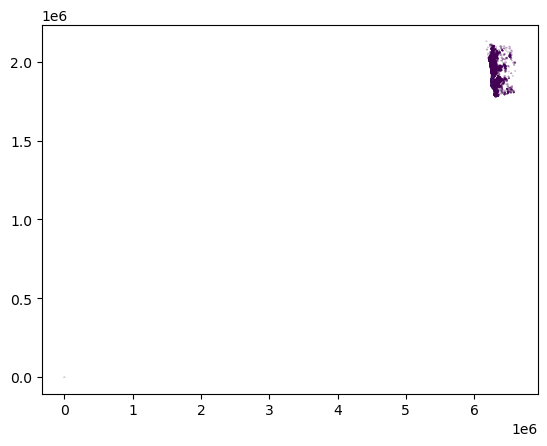

In [73]:
# TODO make hexbins 1/4 mile
hexes = matplotlib.pyplot.hexbin( x= gdf['x'], y=gdf['y'],mincnt=1,gridsize=3970)

In [74]:
hexbins = gpd.points_from_xy(x=[i[0] for i in hexes.get_offsets()],y=[i[1] for i in hexes.get_offsets()])[1:]

In [75]:
left_merge = gpd.GeoDataFrame(hexbins, geometry=0)

In [76]:
full_merge = gpd.sjoin_nearest(left_merge,gdf,how='right')

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_12702/318931066.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:2230

  full_merge = gpd.sjoin_nearest(left_merge,gdf,how='right')


In [77]:
index_and_counts = full_merge.groupby('index_left').count().sort_values(by='x').reset_index()[['index_left','APN',]]

In [78]:
def get_x(index):
    return hexbins[index].x
def get_y(index):
    return hexbins[index].y

In [79]:
index_and_counts['x'] = index_and_counts['index_left'].apply(get_x)
index_and_counts['y'] = index_and_counts['index_left'].apply(get_y)
index_and_counts['geometry'] = gpd.points_from_xy(index_and_counts['x'], index_and_counts['y'])

In [80]:
df = gpd.GeoDataFrame(index_and_counts)

<Axes: >

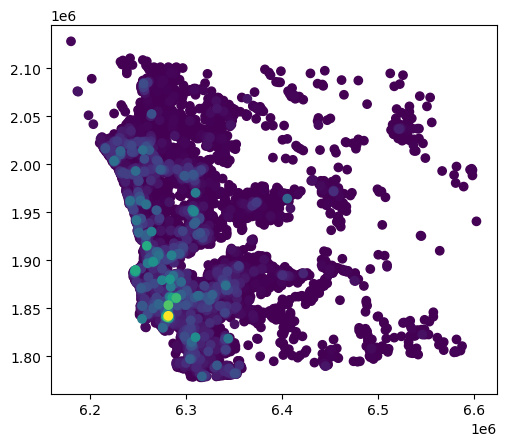

In [81]:
df.plot(column='APN')

<Axes: >

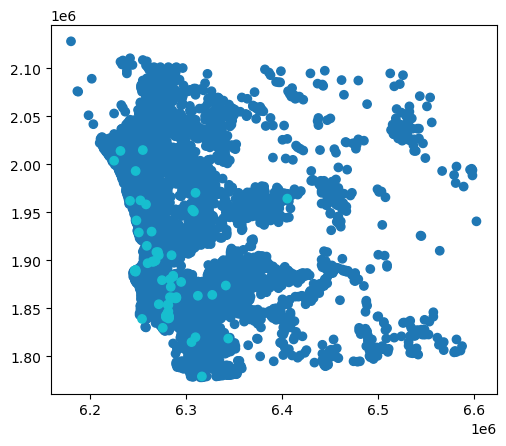

In [144]:
# idea 1 - could we use 70 biggest maxima as centers?
df['is_center'] = df['APN']>100
df.plot(column='is_center')

<Axes: >

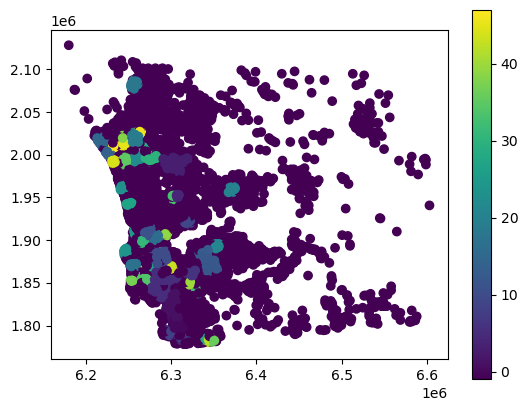

In [135]:
# other idea - what does python have available? 
# basic dbscan clustering on distance
scaler = StandardScaler()
df['scaled_weight'] = scaler.fit_transform(df[['APN']])
features = df[['x', 'y','APN']]
dbscan = DBSCAN(eps=2500, min_samples=20)
df['cluster_label'] = dbscan.fit_predict(features)
df.plot(column='cluster_label', legend=True)

<Axes: >

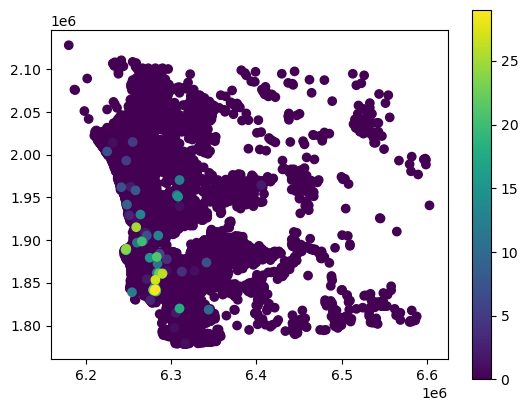

In [148]:
# other idea - db scan but for just the counts to find local maxima?
scaler = StandardScaler()
df['scaled_weight'] = scaler.fit_transform(df[['APN']])
features = df[['APN']]
dbscan = DBSCAN(eps=1, min_samples=1)
df['cluster_label'] = dbscan.fit_predict(features)
df.plot(column='cluster_label', legend=True)